In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    # y = get_label(x, -1, -2, -3)  #Short distance
    y = get_label(x, 0, 1, 2)    #Long distance
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(Y)

In [25]:
# Simple Linear model

i = tf.keras.layers.Input(shape=(T,))
x = tf.keras.layers.Dense(1, activation='sigmoid')(i)

model = tf.keras.models.Model(i, x)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])

In [26]:
r = model.fit(X, Y, epochs=100, validation_split=0.5)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.7687 - accuracy: 0.4980 - val_loss: 0.7049 - val_accuracy: 0.5028
Epoch 2/100
2500/2500 [==============================] - 2s 637us/sample - loss: 0.6968 - accuracy: 0.5012 - val_loss: 0.6943 - val_accuracy: 0.5112
Epoch 3/100
2500/2500 [==============================] - 1s 407us/sample - loss: 0.6954 - accuracy: 0.4988 - val_loss: 0.6937 - val_accuracy: 0.5104
Epoch 4/100
2500/2500 [==============================] - 1s 466us/sample - loss: 0.6953 - accuracy: 0.5048 - val_loss: 0.6930 - val_accuracy: 0.5036
Epoch 5/100
2500/2500 [==============================] - 1s 501us/sample - loss: 0.6952 - accuracy: 0.5056 - val_loss: 0.6939 - val_accuracy: 0.4988
Epoch 6/100
2500/2500 [==============================] - 1s 444us/sample - loss: 0.6953 - accuracy: 0.5132 - val_loss: 0.6956 - val_accuracy: 0.5092
Epoch 7/100
2500/2500 [==============================] - 1s 

2500/2500 [==============================] - 2s 600us/sample - loss: 0.6951 - accuracy: 0.5076 - val_loss: 0.6960 - val_accuracy: 0.4920
Epoch 56/100
2500/2500 [==============================] - 1s 557us/sample - loss: 0.6946 - accuracy: 0.5188 - val_loss: 0.6933 - val_accuracy: 0.5176
Epoch 57/100
2500/2500 [==============================] - 1s 485us/sample - loss: 0.6958 - accuracy: 0.4944 - val_loss: 0.6949 - val_accuracy: 0.5008
Epoch 58/100
2500/2500 [==============================] - 1s 439us/sample - loss: 0.6952 - accuracy: 0.4900 - val_loss: 0.6943 - val_accuracy: 0.4976
Epoch 59/100
2500/2500 [==============================] - 1s 490us/sample - loss: 0.6955 - accuracy: 0.4980 - val_loss: 0.6945 - val_accuracy: 0.5056
Epoch 60/100
2500/2500 [==============================] - 1s 529us/sample - loss: 0.6948 - accuracy: 0.5124 - val_loss: 0.6958 - val_accuracy: 0.4944
Epoch 61/100
2500/2500 [==============================] - 1s 488us/sample - loss: 0.6955 - accuracy: 0.5080 - val

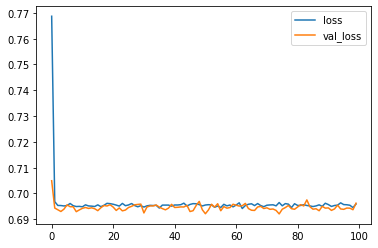

In [27]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

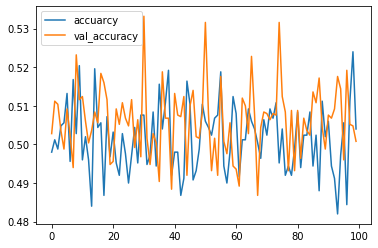

In [28]:
plt.plot(r.history['accuracy'], label='accuarcy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [29]:
model.evaluate(X[50:], Y[50:], verbose='quiet')

[0.6941547396207096, 0.5137374]

In [30]:
# Simple RNN model

i = tf.keras.layers.Input(shape=(T,1))

o = tf.keras.layers.SimpleRNN(5)(i)

o = tf.keras.layers.Dense(1, activation='sigmoid')(o)

model = tf.keras.models.Model(i, o)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])

In [31]:
r = model.fit(np.expand_dims(X, -1), Y, epochs=100, validation_split=0.5)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 11s 5ms/sample - loss: 0.6929 - accuracy: 0.5268 - val_loss: 0.6887 - val_accuracy: 0.5508
Epoch 2/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6884 - accuracy: 0.5504 - val_loss: 0.6868 - val_accuracy: 0.5472
Epoch 3/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6826 - accuracy: 0.5632 - val_loss: 0.6847 - val_accuracy: 0.5716
Epoch 4/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6804 - accuracy: 0.5580 - val_loss: 0.6851 - val_accuracy: 0.5656
Epoch 5/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6549 - accuracy: 0.6244 - val_loss: 0.6690 - val_accuracy: 0.5980
Epoch 6/100
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.6327 - accuracy: 0.6432 - val_loss: 0.6797 - val_accuracy: 0.5716
Epoch 7/100
2500/2500 [==============================] - 4s 2ms/sampl

2500/2500 [==============================] - 3s 1ms/sample - loss: 0.3257 - accuracy: 0.8800 - val_loss: 0.3308 - val_accuracy: 0.8724
Epoch 57/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.3207 - accuracy: 0.8824 - val_loss: 0.3297 - val_accuracy: 0.8784
Epoch 58/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.3053 - accuracy: 0.8940 - val_loss: 0.3635 - val_accuracy: 0.8640
Epoch 59/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.2682 - accuracy: 0.9056 - val_loss: 0.2545 - val_accuracy: 0.9152
Epoch 60/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.2851 - accuracy: 0.9012 - val_loss: 0.2899 - val_accuracy: 0.8964
Epoch 61/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.2493 - accuracy: 0.9132 - val_loss: 0.2003 - val_accuracy: 0.9372
Epoch 62/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.2228 - accuracy: 0.9312 - val_loss: 0.2009 

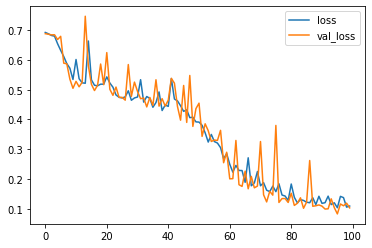

In [32]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

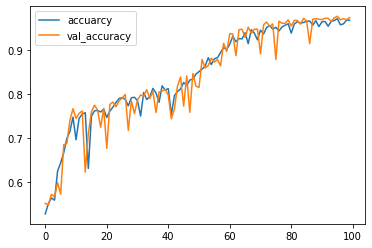

In [33]:
plt.plot(r.history['accuracy'], label='accuarcy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [34]:
model.evaluate(np.expand_dims(X[50:], -1), Y[50:], verbose='quiet')

[0.10333584570523464, 0.97232324]

In [35]:
# LSTM model

i = tf.keras.layers.Input(shape=(T,1))

o = tf.keras.layers.LSTM(5)(i)

o = tf.keras.layers.Dense(1, activation='sigmoid')(o)

model = tf.keras.models.Model(i, o)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])

In [36]:
r = model.fit(np.expand_dims(X, -1), Y, epochs=100, validation_split=0.5)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 33s 13ms/sample - loss: 0.6954 - accuracy: 0.4816 - val_loss: 0.6933 - val_accuracy: 0.4916
Epoch 2/100
2500/2500 [==============================] - 6s 3ms/sample - loss: 0.6936 - accuracy: 0.5028 - val_loss: 0.6939 - val_accuracy: 0.4932
Epoch 3/100
2500/2500 [==============================] - 6s 2ms/sample - loss: 0.6936 - accuracy: 0.5132 - val_loss: 0.6932 - val_accuracy: 0.5024
Epoch 4/100
2500/2500 [==============================] - 6s 3ms/sample - loss: 0.6936 - accuracy: 0.4956 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 5/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.6935 - accuracy: 0.4964 - val_loss: 0.6935 - val_accuracy: 0.4840
Epoch 6/100
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6933 - val_accuracy: 0.4876
Epoch 7/100
2500/2500 [==============================] - 8s 3ms/samp

2500/2500 [==============================] - 5s 2ms/sample - loss: 0.0533 - accuracy: 0.9844 - val_loss: 0.0537 - val_accuracy: 0.9836
Epoch 57/100
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.0389 - accuracy: 0.9864 - val_loss: 0.0403 - val_accuracy: 0.9868
Epoch 58/100
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.0444 - accuracy: 0.9848 - val_loss: 0.0649 - val_accuracy: 0.9796
Epoch 59/100
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.0364 - accuracy: 0.9876 - val_loss: 0.0550 - val_accuracy: 0.9836
Epoch 60/100
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.0625 - accuracy: 0.9820 - val_loss: 0.0527 - val_accuracy: 0.9828
Epoch 61/100
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.0322 - accuracy: 0.9900 - val_loss: 0.0463 - val_accuracy: 0.9856
Epoch 62/100
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.0625 

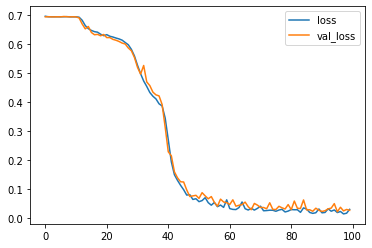

In [37]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

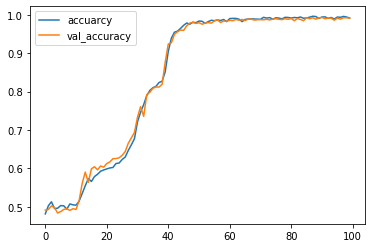

In [38]:
plt.plot(r.history['accuracy'], label='accuarcy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [39]:
model.evaluate(np.expand_dims(X[50:], -1), Y[50:], verbose='quiet')

[0.021037745606342348, 0.9929293]

In [40]:
# GRU model

i = tf.keras.layers.Input(shape=(T,1))

o = tf.keras.layers.GRU(5)(i)

o = tf.keras.layers.Dense(1, activation='sigmoid')(o)

model = tf.keras.models.Model(i, o)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])

In [ ]:
r = model.fit(np.expand_dims(X, -1), Y, epochs=100, validation_split=0.5)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 24s 10ms/sample - loss: 0.6949 - accuracy: 0.5036 - val_loss: 0.6969 - val_accuracy: 0.4952
Epoch 2/100
2500/2500 [==============================] - 7s 3ms/sample - loss: 0.6947 - accuracy: 0.4908 - val_loss: 0.6948 - val_accuracy: 0.4928
Epoch 3/100
2500/2500 [==============================] - 8s 3ms/sample - loss: 0.6946 - accuracy: 0.4984 - val_loss: 0.6928 - val_accuracy: 0.5060
Epoch 4/100
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.6949 - accuracy: 0.4864 - val_loss: 0.6936 - val_accuracy: 0.4952
Epoch 5/100
2500/2500 [==============================] - 6s 2ms/sample - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.4956
Epoch 6/100
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.6936 - accuracy: 0.5088 - val_loss: 0.6936 - val_accuracy: 0.5040
Epoch 7/100
2500/2500 [==============================] - 9s 4ms/samp

2500/2500 [==============================] - 4s 2ms/sample - loss: 0.2040 - accuracy: 0.9400 - val_loss: 0.1974 - val_accuracy: 0.9428
Epoch 57/100
2500/2500 [==============================] - 6s 3ms/sample - loss: 0.1761 - accuracy: 0.9488 - val_loss: 0.1866 - val_accuracy: 0.9444
Epoch 58/100
2500/2500 [==============================] - 6s 2ms/sample - loss: 0.1976 - accuracy: 0.9388 - val_loss: 0.1981 - val_accuracy: 0.9372
Epoch 59/100
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.2030 - accuracy: 0.9384 - val_loss: 0.1845 - val_accuracy: 0.9480
Epoch 60/100
2500/2500 [==============================] - 6s 2ms/sample - loss: 0.1600 - accuracy: 0.9544 - val_loss: 0.1510 - val_accuracy: 0.9564
Epoch 61/100
2368/2500 [===========================>..] - ETA: 0s - loss: 0.1460 - accuracy: 0.9595

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(r.history['accuracy'], label='accuarcy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(np.expand_dims(X[50:], -1), Y[50:], verbose='quiet')